#Analsis de las señales

In [9]:
import librosa
from IPython.display import Audio, display
import numpy as np
from google.colab import drive
import librosa.display
from scipy.stats import shapiro
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import pandas as pd

In [10]:
def analizar_resultado_shapiro(grupo, muestra, stat_w, p_valor, nivel_significancia=0.05):
    """
    Imprime los resultados de la prueba de Shapiro-Wilk y la conclusión
    sobre la normalidad de la distribución.
    """
    print(f"--- Resultados Analisis para {grupo} ---")
    print(f"Muestra: {muestra}")
    print(f"P-valor: {p_valor:.3f}")

    if p_valor > nivel_significancia:
        print("Conclusión: El P-valor es > 0.05. Se acepta H0: La distribución es NORMAL.")
    else:
        print("Conclusión: El P-valor es <= 0.05. Se rechaza H0: La distribución NO es normal.")


In [11]:
def analisis_completo_grupos(datos_grupos, nivel_significancia=0.05):


    # Variables para almacenar resultados
    resultados_normalidad = []
    normalidad_dict = {}
    #Prueba Shapiro
    for nombre_grupo, muestra in datos_grupos.items():
        stat_w, p_valor = shapiro(muestra)

        # Almacenar el p-valor para la comparación posterior
        normalidad_dict[nombre_grupo] = p_valor

        # Determinar la Conclusión de Normalidad
        if p_valor > nivel_significancia:
            conclusion = "Se acepta H0: La distribución es NORMAL."
        else:
            conclusion = "Se rechaza H0: La distribución NO es normal."

        resultados_normalidad.append({
            'Grupo': nombre_grupo,
            'Valor (p-val)': f"p={p_valor:.3f}",
            'Resultado Normalidad': conclusion
        })

    df_normalidad = pd.DataFrame(resultados_normalidad)
    df_tabla_normalidad = df_normalidad[['Grupo', 'Valor (p-val)', 'Resultado Normalidad']]
    #Analisis por Pares
    # Definir todas las combinaciones posibles de los grupos.
    grupos_nombres = list(datos_grupos.keys())
    pares_comparacion = []
    for i in range(len(grupos_nombres)):
        for j in range(i + 1, len(grupos_nombres)):
            pares_comparacion.append((grupos_nombres[i], grupos_nombres[j]))

    resultados_comparacion = []

    for g1_nombre, g2_nombre in pares_comparacion:
        g1_datos = datos_grupos[g1_nombre]
        g2_datos = datos_grupos[g2_nombre]
        es_normal_g1 = normalidad_dict[g1_nombre] > nivel_significancia
        es_normal_g2 = normalidad_dict[g2_nombre] > nivel_significancia

        # SELECCIÓN Y APLICACIÓN DE LA PRUEBA
        if es_normal_g1 and es_normal_g2:
            tipo_prueba = "t-Student (Ambos Normales)"
            stat, p_comparacion = ttest_ind(g1_datos, g2_datos, equal_var=False) # Welch's
            if p_comparacion < nivel_significancia:
                conclusion = "Diferencia significativa en medias."
            else:
                conclusion = "No hay diferencia significativa en medias."

        else:
            # Al menos uno NO es normal -> Usar Mann-Whitney U
            tipo_prueba = "Mann-Whitney U (Uno/Ambos No Normal)"
            stat, p_comparacion = mannwhitneyu(g1_datos, g2_datos)
            if p_comparacion < nivel_significancia:
                conclusion = "Diferencia significativa en medianas/distribuciones."
            else:
                conclusion = "No hay diferencia significativa en medianas/distribuciones."

        # Almacenar el resultado de comparación
        resultados_comparacion.append({
            'Comparación': f'{g1_nombre} vs {g2_nombre}',
            'Prueba Aplicada': tipo_prueba,
            'P-valor': f"{p_comparacion:.3f}",
            'Conclusión': conclusion
        })

    df_comparacion = pd.DataFrame(resultados_comparacion)

    # 3. Retornar las dos tablas
    return df_tabla_normalidad, df_comparacion

In [12]:
datos = {
    'Paisas': { 'mujeres': [28, 27, 22, 19, 19], 'hombres': [21, 21, 23, 24, 25] },
    'Rolos': { 'mujeres': [21, 24, 24, 25, 25], 'hombres': [19, 20, 23, 25,22] },
    'Costeños': { 'mujeres': [20, 21, 25, 22, 22], 'hombres': [18, 22, 27, 26, 26] }
}


#Datos de Hombres
datos_hombres = (
    datos['Paisas']['hombres'] +
    datos['Rolos']['hombres'] +
    datos['Costeños']['hombres']
)

#Datos de Mujeres
datos_mujeres = (
    datos['Paisas']['mujeres'] +
    datos['Rolos']['mujeres'] +
    datos['Costeños']['mujeres']
)

#-Una prueba estadisticas para Grupo de Hombres Generalizados Mujeres generalizados.
#-Una prueba estadistica entre hombre y mujejres, entre acentos.

#Realizar la prueba de Shapiro-Wilk para Hombres
stat_hombres, p_hombres = shapiro(datos_hombres)
#Realizar la prueba de Shapiro-Wilk para Mujeres
stat_mujeres, p_mujeres = shapiro(datos_mujeres)
analizar_resultado_shapiro(" Hombres ", datos_hombres, stat_hombres, p_hombres)
print("")
print("")
analizar_resultado_shapiro(" Mujeres ", datos_mujeres, stat_mujeres, p_mujeres)



--- Resultados Analisis para  Hombres  ---
Muestra: [21, 21, 23, 24, 25, 19, 20, 23, 25, 22, 18, 22, 27, 26, 26]
P-valor: 0.834
Conclusión: El P-valor es > 0.05. Se acepta H0: La distribución es NORMAL.


--- Resultados Analisis para  Mujeres  ---
Muestra: [28, 27, 22, 19, 19, 21, 24, 24, 25, 25, 20, 21, 25, 22, 22]
P-valor: 0.538
Conclusión: El P-valor es > 0.05. Se acepta H0: La distribución es NORMAL.


Text(0.5, 1.0, 'Comparación Distribuciones Hombre y Mujeres')

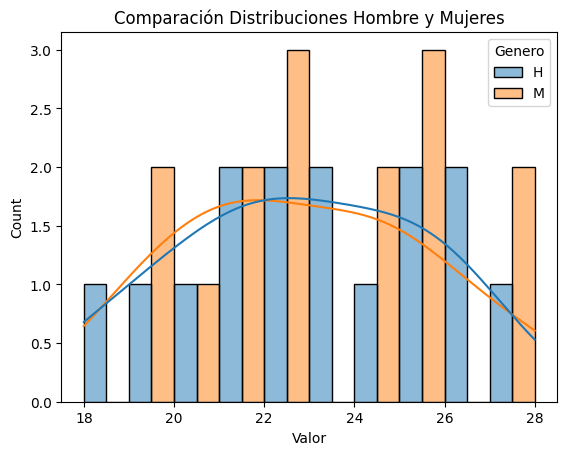

In [13]:
df_hombres = pd.DataFrame({'Valor': datos_hombres, 'Genero': 'H'}) # 'H' para Hombres
df_mujeres = pd.DataFrame({'Valor': datos_mujeres, 'Genero': 'M'}) # 'M' para Mujeres
df_combinado = pd.concat([df_hombres, df_mujeres], ignore_index=True)

# --- 3. Generación de la Gráfica de Histograma Hombres vs Mujeres ---

import seaborn as sns

df = df_combinado.copy() # Use df_combinado and make a copy to avoid SettingWithCopyWarning
df = df[['Genero','Valor']]
df_hombres = df[df['Genero'] == 'H']['Valor']
df_mujeres = df[df['Genero'] == 'M']['Valor']
df_hombres.head()
sns.histplot(data = df, x='Valor',hue='Genero',bins=10,kde=True,multiple='dodge')
plt.title("Comparación Distribuciones Hombre y Mujeres")

In [14]:
from scipy.stats import ttest_ind

# Prueba t-Student (Welch)
t_stat, p_val_t = ttest_ind(datos_hombres, datos_mujeres, equal_var=False)

print("")
print(f"P-valor: {p_val_t}")
print("")

if p_val_t < 0.05:
    print("|--------------------------------------------|")
    print("| Diferencia significativa entre las edades. |")
    print("|--------------------------------------------|")
else:
    print("|-----------------------------------------------------------------------|")
    print("| No hay diferencia significativa entre las edades (no se rechaza H0).  |")
    print("|-----------------------------------------------------------------------|")





P-valor: 0.8947176656124365

|-----------------------------------------------------------------------|
| No hay diferencia significativa entre las edades (no se rechaza H0).  |
|-----------------------------------------------------------------------|


In [15]:
#Pruebas Estadisticas entre acentos Hombre:

data_hombres = {
    'Paisas': datos['Paisas']['hombres'],
    'Rolos': datos['Rolos']['hombres'],
    'Costeños': datos['Costeños']['hombres']
}

df_normalidad, df_comparacion = analisis_completo_grupos(data_hombres)

print("--- TABLA 1: RESULTADOS DE NORMALIDAD (SHAPIRO-WILK) ---")
print(df_normalidad.to_markdown(index=False))
print("")
print("")
print("\n--- TABLA 2: RESULTADOS DE COMPARACIÓN POR PARES (t-Student / Mann-Whitney U) ---")
print(df_comparacion.to_markdown(index=False))

--- TABLA 1: RESULTADOS DE NORMALIDAD (SHAPIRO-WILK) ---
| Grupo    | Valor (p-val)   | Resultado Normalidad                     |
|:---------|:----------------|:-----------------------------------------|
| Paisas   | p=0.377         | Se acepta H0: La distribución es NORMAL. |
| Rolos    | p=0.899         | Se acepta H0: La distribución es NORMAL. |
| Costeños | p=0.194         | Se acepta H0: La distribución es NORMAL. |



--- TABLA 2: RESULTADOS DE COMPARACIÓN POR PARES (t-Student / Mann-Whitney U) ---
| Comparación        | Prueba Aplicada            |   P-valor | Conclusión                                 |
|:-------------------|:---------------------------|----------:|:-------------------------------------------|
| Paisas vs Rolos    | t-Student (Ambos Normales) |     0.477 | No hay diferencia significativa en medias. |
| Paisas vs Costeños | t-Student (Ambos Normales) |     0.612 | No hay diferencia significativa en medias. |
| Rolos vs Costeños  | t-Student (Ambos Normales) | 

In [16]:
#Pruebas Estadisticas entre acentos Mujeres:
data_mujeres = {
    'Paisas': datos['Paisas']['mujeres'],
    'Rolos': datos['Rolos']['mujeres'],
    'Costeños': datos['Costeños']['mujeres']
}

df_normalidad_2, df_comparacion_2 = analisis_completo_grupos(data_mujeres)

print("--- TABLA 1: RESULTADOS DE NORMALIDAD (SHAPIRO-WILK) ---")
print(df_normalidad_2.to_markdown(index=False))
print("")
print("")
print("\n--- TABLA 2: RESULTADOS DE COMPARACIÓN POR PARES (t-Student / Mann-Whitney U) ---")
print(df_comparacion_2.to_markdown(index=False))

--- TABLA 1: RESULTADOS DE NORMALIDAD (SHAPIRO-WILK) ---
| Grupo    | Valor (p-val)   | Resultado Normalidad                     |
|:---------|:----------------|:-----------------------------------------|
| Paisas   | p=0.182         | Se acepta H0: La distribución es NORMAL. |
| Rolos    | p=0.054         | Se acepta H0: La distribución es NORMAL. |
| Costeños | p=0.453         | Se acepta H0: La distribución es NORMAL. |



--- TABLA 2: RESULTADOS DE COMPARACIÓN POR PARES (t-Student / Mann-Whitney U) ---
| Comparación        | Prueba Aplicada            |   P-valor | Conclusión                                 |
|:-------------------|:---------------------------|----------:|:-------------------------------------------|
| Paisas vs Rolos    | t-Student (Ambos Normales) |     0.713 | No hay diferencia significativa en medias. |
| Paisas vs Costeños | t-Student (Ambos Normales) |     0.652 | No hay diferencia significativa en medias. |
| Rolos vs Costeños  | t-Student (Ambos Normales) | 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Duración: 30.48 s   |   fs: 16000 Hz
Duración segmento: 4.000 s
Tamaño segmento: 64000 muestras


Duración de la ventana: 0.02 s
Tamaño de la ventana: 320 muestras
NFFT: 320
Total de ventanas: 200
porcentaje de superposición: 50.0%
Tamaño de la superposición(noverlap): 160 muestras
Tamaño del hop: 160 muestras


/tmp/ipython-input-3840072714.py:61: MatplotlibDeprecationWarning: Passing the NFFT parameter of specgram() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.specgram(segmento,


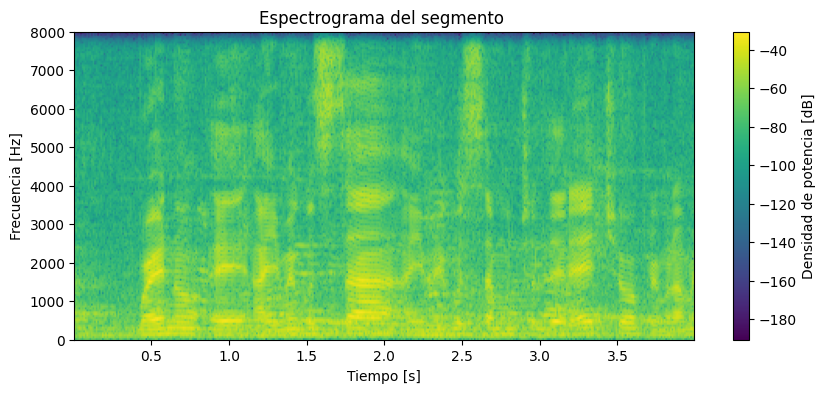

In [17]:
import librosa
import librosa.display

from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


base_path = '/content/drive/My Drive/labSeñales/proyecto/Data_set/paisas/'
file_name = 'hombre_paisa_25.wav'

path = base_path + file_name

y, fs = librosa.load(path, sr=None, mono=True)

y=librosa.resample(y, orig_sr=fs, target_sr=16000)
fs=16000

#como la funcion hace el remuetreo

y=librosa.util.normalize(y, norm=np.inf)
#como la funcion normaliza



print(f'Duración: {len(y)/fs:.2f} s   |   fs: {fs} Hz')


t_ini = 1
t_fin = 5
idx_ini = int(t_ini * fs)
idx_fin = int(t_fin * fs)
segmento = y[idx_ini:idx_fin]
segmento_muestras = len(segmento)
duracion_segmento = segmento_muestras/fs

print(f'Duración segmento: {duracion_segmento:.3f} s')
print(f'Tamaño segmento: {segmento_muestras} muestras')

display(Audio(segmento, rate=fs))

ventana_segundos = 0.02
ventana_muestras = int(ventana_segundos * fs)
NFFT=ventana_muestras
print(f'Duración de la ventana: {ventana_segundos} s')
print(f'Tamaño de la ventana: {ventana_muestras} muestras')
print(f'NFFT: {NFFT}')

total_ventanas=int(segmento_muestras/ventana_muestras)
print(f'Total de ventanas: {total_ventanas}')

noverlap=NFFT//2
print(f'porcentaje de superposición: {noverlap/NFFT*100}%')
print(f'Tamaño de la superposición(noverlap): {noverlap} muestras')
hop_length = NFFT - noverlap
print(f'Tamaño del hop: {hop_length} muestras')

plt.figure(figsize=(10, 4))
plt.specgram(segmento,
             NFFT,
             Fs=fs,
             noverlap=noverlap,
             cmap='viridis')

plt.title('Espectrograma del segmento ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.colorbar(label='Densidad de potencia [dB]')

plt.show()


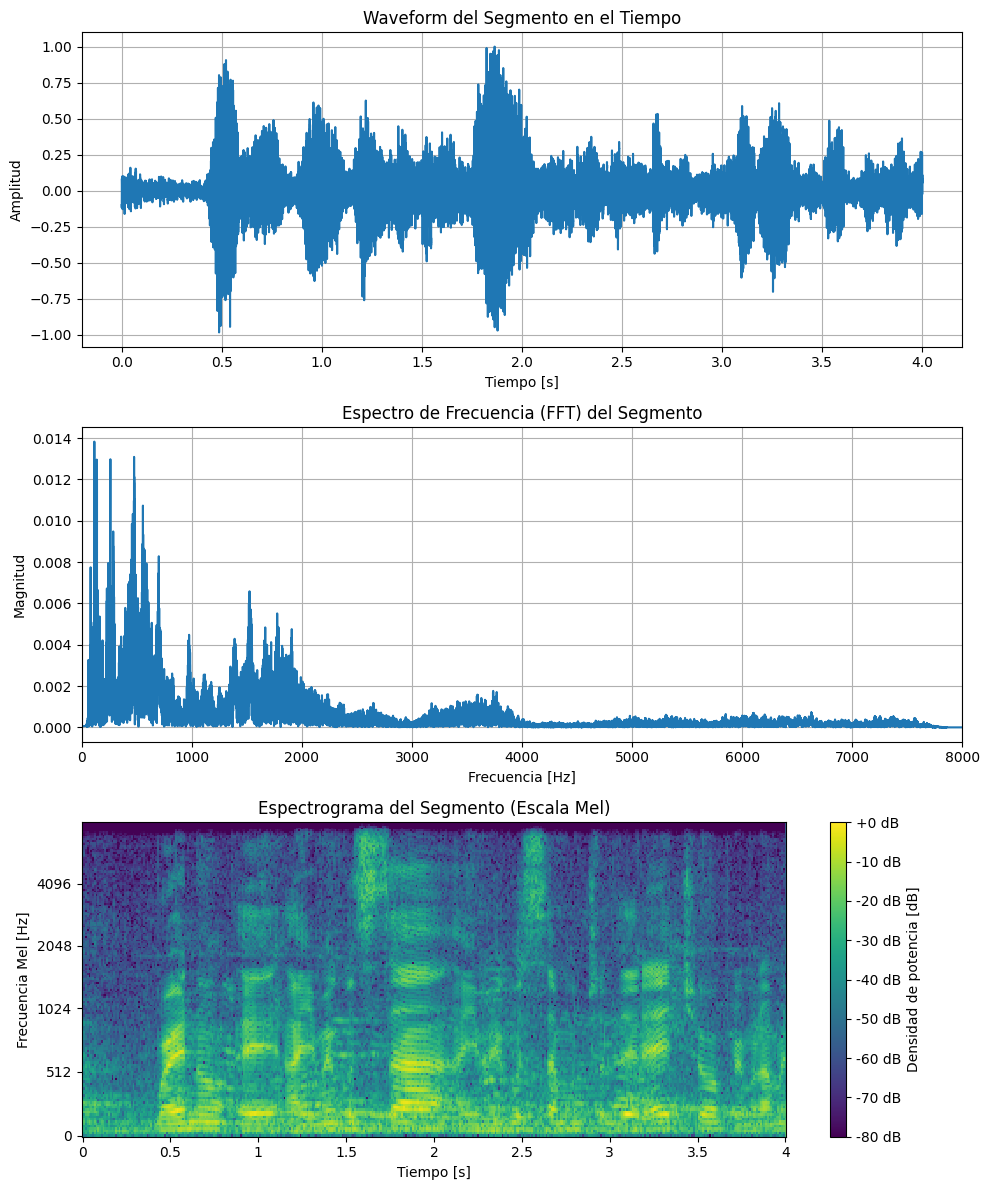

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Create a figure with 3 subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# --- Subplot 1: Time-domain waveform ---
# Create a time array for the segment
time_segmento = np.arange(len(segmento)) / fs
ax1.plot(time_segmento, segmento)
ax1.set_title('Waveform del Segmento en el Tiempo')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(True)

# --- Subplot 2: Frequency-domain (FFT) ---
# Compute the FFT
N = len(segmento)
yf = np.fft.fft(segmento)
xfa = np.fft.fftfreq(N, 1/fs)

# Plot the magnitude spectrum (only positive frequencies)
ax2.plot(xfa[:N // 2], 2/N * np.abs(yf[:N // 2]))
ax2.set_title('Espectro de Frecuencia (FFT) del Segmento')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Magnitud')
ax2.grid(True)
ax2.set_xlim(0, fs / 2) # Limit to Nyquist frequency

# --- Subplot 3: Spectrogram (Mel Scale) ---
# librosa.display.specshow is generally preferred for spectrograms with librosa
D = librosa.amplitude_to_db(np.abs(librosa.stft(segmento, n_fft=NFFT, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='mel', hop_length=hop_length, ax=ax3, cmap='viridis')
ax3.set_title('Espectrograma del Segmento (Escala Mel)')
ax3.set_xlabel('Tiempo [s]')
ax3.set_ylabel('Frecuencia Mel [Hz]')
fig.colorbar(ax3.collections[0], format='%+2.0f dB', ax=ax3, label='Densidad de potencia [dB]')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

(0.0, 8000.0)

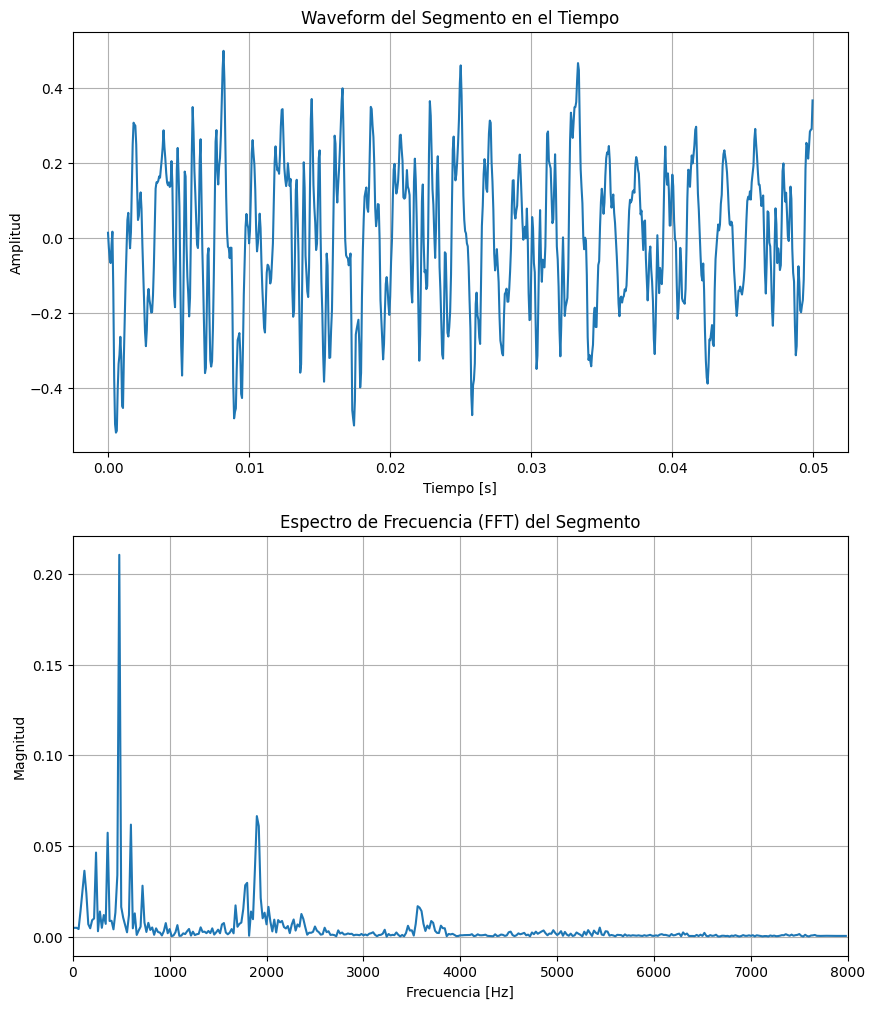

In [19]:
t_ini = 2
t_fin = 2.050
idx_ini = int(t_ini * fs)
idx_fin = int(t_fin * fs)
segmento = y[idx_ini:idx_fin]

ventana_segundos = 0.050
ventana_muestras = int(ventana_segundos * fs)
NFFT=ventana_muestras

noverlap=NFFT//2
hop_length = NFFT - noverlap

display(Audio(segmento, rate=fs))

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Create a figure with 3 subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=False)

# --- Subplot 1: Time-domain waveform ---
# Create a time array for the segment
time_segmento = np.arange(len(segmento)) / fs
ax1.plot(time_segmento, segmento)
ax1.set_title('Waveform del Segmento en el Tiempo')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(True)

# --- Subplot 2: Frequency-domain (FFT) ---
# Compute the FFT
N = len(segmento)
yf = np.fft.fft(segmento)
xfa = np.fft.fftfreq(N, 1/fs)

# Plot the magnitude spectrum (only positive frequencies)
ax2.plot(xfa[:N // 2], 2/N * np.abs(yf[:N // 2]))
ax2.set_title('Espectro de Frecuencia (FFT) del Segmento')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Magnitud')
ax2.grid(True)
ax2.set_xlim(0, fs / 2) # Limit to Nyquist frequency



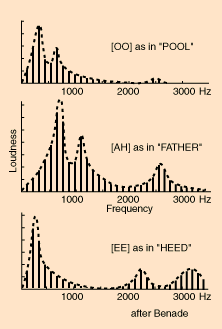

In [20]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import resample
import os
import glob
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio, display
drive.mount('/content/drive')

def aplicar_filtro_pasabajas(senal, fs, fc=7000, num_taps=61):
    n = np.arange(num_taps)
    M = num_taps - 1
    ventana = 0.54 - 0.46 * np.cos(2 * np.pi * n / M)
    sinc_func = np.sinc(2 * fc * (n - M/2) / fs)
    h = ventana * sinc_func
    h = h / np.sum(h)
    senal_filtrada = np.convolve(senal, h, mode='same')
    return senal_filtrada

def resampleo_manual_lineal(audio, fs_original, fs_nueva):

    ratio = fs_nueva / fs_original
    num_muestras_original = len(audio)
    num_muestras_nueva = int(num_muestras_original * ratio)
    indices_flotantes = np.linspace(0, num_muestras_original - 1, num_muestras_nueva)
    indices_izq = np.floor(indices_flotantes).astype(int)
    indices_der = np.ceil(indices_flotantes).astype(int)
    indices_der = np.clip(indices_der, 0, num_muestras_original - 1)
    alpha = indices_flotantes - indices_izq
    senal_izq = audio[indices_izq]
    senal_der = audio[indices_der]
    audio_resampleado = (senal_izq * (1 - alpha)) + (senal_der * alpha)
    return audio_resampleado

def preprocesar_audio(ruta_archivo, fs_objetivo=16000):
    fs_orig, audio = wav.read(ruta_archivo)
    if len(audio.shape) > 1:
        audio = np.mean(audio, axis=1)

    audio_filtered= aplicar_filtro_pasabajas(audio, fs_orig)
    audio_resampled = resampleo_manual_lineal(audio_filtered, fs_orig, fs_objetivo)


    max_val = np.max(np.abs(audio_resampled))
    if max_val > 0:
        audio_norm = audio_resampled / max_val
    else:
        audio_norm = audio_resampled
    return audio_norm, fs_objetivo



def enventanar_senal(senal, fs, win_size_ms, overlap_perc=0.5):
    N_w = int(fs * win_size_ms / 1000)
    step = int(N_w * (1 - overlap_perc))
    longitud_senal = len(senal)
    num_ventanas = int((longitud_senal - N_w) / step) + 1
    frames = np.zeros((num_ventanas, N_w))
    n_idx = np.arange(N_w)
    ventana_hamming = 0.54 - 0.46 * np.cos(2 * np.pi * n_idx / (N_w - 1))
    for i in range(num_ventanas):
        inicio = i * step
        fin = inicio + N_w
        fragmento = senal[inicio:fin]
        frames[i, :] = fragmento * ventana_hamming
    return frames

def calcular_nfft_potencia_de_2(fs, ventana_segundos):
    num_muestras_ventana = int(fs * ventana_segundos)
    nfft = 1
    while nfft < num_muestras_ventana:
        nfft *= 2
    return nfft


def calcular_espectro_potencia(frames, NFFT):
    espectro_complejo = np.fft.fft(frames, n=NFFT, axis=1)
    puntos_validos = NFFT // 2 + 1
    espectro_complejo = espectro_complejo[:, :puntos_validos]
    potencia = (np.abs(espectro_complejo) ** 2) / NFFT
    return potencia

def crear_banco_filtros_manual(fs, NFFT, num_filtros=26):
    low_freq_mel = 0
    high_freq_mel = 2595 * np.log10(1 + (fs / 2) / 700)
    mel_points = np.linspace(low_freq_mel, high_freq_mel, num_filtros + 2)
    hz_points = 700 * (10**(mel_points / 2595) - 1)
    bin = np.floor((NFFT + 1) * hz_points / fs)
    fbank = np.zeros((num_filtros, int(NFFT / 2 + 1)))
    for m in range(1, num_filtros + 1):
        f_m_minus = int(bin[m - 1])
        f_m = int(bin[m])
        f_m_plus = int(bin[m + 1])
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    return fbank

def extraer_energias(potencia_frames, fbank):
    energias = np.dot(potencia_frames, fbank.T)
    energias = np.where(energias == 0, np.finfo(float).eps, energias)
    energias_log = 10 * np.log10(energias)
    return energias_log

def aplicar_dct_manual(energias_log, num_ceps=13):
    num_frames, num_filtros = energias_log.shape
    mfccs = np.zeros((num_frames, num_ceps))
    n = np.arange(num_filtros)
    base_cosenos = np.zeros((num_ceps, num_filtros))
    for k in range(num_ceps):
        base_cosenos[k, :] = np.cos(np.pi * k * (2 * n + 1) / (2 * num_filtros))
    mfccs = np.dot(energias_log, base_cosenos.T)
    return mfccs

def obtener_vector_acento(mfccs):
    media = np.mean(mfccs, axis=0)
    desviacion = np.std(mfccs, axis=0)
    vector_caracteristico = np.concatenate([media, desviacion])
    return vector_caracteristico

def procesar_audio_completo(ruta):
    senal, fs = preprocesar_audio(ruta)

    win_size_ms = 50
    ventana_segundos = win_size_ms / 1000.0
    NFFT_SIZE = calcular_nfft_potencia_de_2(fs, ventana_segundos)

    frames = enventanar_senal(senal, fs, win_size_ms)

    potencia = calcular_espectro_potencia(frames, NFFT=NFFT_SIZE)
    fbank = crear_banco_filtros_manual(fs, NFFT=NFFT_SIZE, num_filtros=26)
    energias = extraer_energias(potencia, fbank)
    mfccs = aplicar_dct_manual(energias, num_ceps=13)
    vector_caracteristico = obtener_vector_acento(mfccs)
    return vector_caracteristico

def distancia_coseno_manual(vec_a, vec_b):
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    if norm_a == 0 or norm_b == 0:
        return 1.0
    similarity = dot_product / (norm_a * norm_b)
    distancia = 1.0 - similarity
    return distancia

def entrenar_modelos_promedio(base_datos_rutas):
    modelos_promedio = {}
    print("Iniciando entrenamiento (Extracción de características)...")
    for acento, lista_rutas in base_datos_rutas.items():
        print(f"Procesando acento: {acento} ({len(lista_rutas)} audios)...")
        vectores_individuales = []
        for ruta in lista_rutas:
            try:
                vector = procesar_audio_completo(ruta)
                vectores_individuales.append(vector)
            except Exception as e:
                print(f"Error procesando {ruta}: {e}")

        if not vectores_individuales:
            print(f"ADVERTENCIA: No se encontraron audios válidos para el acento '{acento}'. El modelo para este acento no se generará o contendrá NaNs. Por favor, verifica las rutas y los archivos de audio.")
            modelos_promedio[acento] = {'centroid': np.full(26, np.nan), 'individual_vectors': []}
            continue

        matriz_vectores = np.array(vectores_individuales)
        vector_maestro = np.mean(matriz_vectores, axis=0)
        modelos_promedio[acento] = {
            'centroid': vector_maestro,
            'individual_vectors': matriz_vectores
        }
        print(f"-> Modelo {acento} generado. Tamaño: {vector_maestro.shape}")
    print("\n¡Entrenamiento completado!")
    return modelos_promedio

def clasificar_nuevo_audio(ruta_audio, modelos):
    """ Compara el audio contra los 3 centroides y decide """
    vector_incognita = procesar_audio_completo(ruta_audio)
    if vector_incognita is None: return "Error archivo", None

    scores = {}
    print(f"\nAnalizando: {os.path.basename(ruta_audio)}")
    print(f"{'ACENTO':<10} | {'DISTANCIA COSENO'}")
    print("-" * 30)

    min_dist = float('inf')
    ganador = None

    for acento, data in modelos.items():
        centroid = data['centroid']
        if np.isnan(centroid).all():
             print(f"{acento:<10} | {'N/A (No model)':<16}")
             continue

        distancia = distancia_coseno_manual(vector_incognita, centroid)
        scores[acento] = distancia

        print(f"{acento:<10} | {distancia:.4f}")

        if distancia < min_dist:
            min_dist = distancia
            ganador = acento

    if ganador is None:
        print("-> CLASIFICACIÓN: No se pudo clasificar (Modelos no disponibles).")
        return "No Clasificado", vector_incognita # Return vector for plotting
    else:
        print(f"-> CLASIFICACIÓN: {ganador.upper()}")
        return ganador, vector_incognita # Return vector for plotting

def graficar_distribucion_distancias(vector_incognita, modelos, ruta_audio_nombre="Audio Prueba"):
    plt.figure(figsize=(12, 6))

    all_distances = []
    labels = []

    for acento, data in modelos.items():
        individual_vectors = data['individual_vectors']
        if len(individual_vectors) == 0:
            print(f"Advertencia: No hay vectores individuales para {acento}, se omite de la gráfica.")
            continue

        distances = [distancia_coseno_manual(vector_incognita, vec) for vec in individual_vectors]

        sns.kdeplot(distances, label=f'{acento} (Media: {np.mean(distances):.3f})', fill=True, alpha=0.5)

        all_distances.extend(distances)
        labels.extend([acento] * len(distances))

    plt.title(f'Distribución de Distancias Coseno para {os.path.basename(ruta_audio_nombre)}')
    plt.xlabel('Distancia Coseno (0 = idéntico, 2 = opuesto)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(left=0)
    plt.show()

def detectar_acento(ruta_prueba, modelos_promedio):
    if any(not np.isnan(data['centroid']).all() for data in modelos_promedio.values()):
        if os.path.exists(ruta_prueba):
            _, vector_incognita = clasificar_nuevo_audio(ruta_prueba, modelos_promedio)
            y, fs = librosa.load(ruta_prueba, sr=None, mono=True)
            display(Audio(y, rate=fs))

            if vector_incognita is not None:
                graficar_distribucion_distancias(vector_incognita, modelos_promedio, ruta_prueba)
        else:
            print(f"\nOJO: No encontré el archivo de prueba en '{ruta_prueba}'. Asegúrate de que el archivo exista o cambia la variable 'ruta_prueba'.")
    else:
        print("\nNo se pudieron entrenar modelos para ningún acento. No se realizará la clasificación.")

if __name__ == "__main__":
    base_drive_path = '/content/drive/My Drive/labSeñales/proyecto/Data_set/'
    db_entrenamiento = {}

    accents = ['paisas', 'rolos', 'costeños']

    for accent in accents:
        paths = glob.glob(os.path.join(base_drive_path, accent,  '*.wav'))

        db_entrenamiento[accent] = paths

    modelos_promedio = entrenar_modelos_promedio(db_entrenamiento)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Iniciando entrenamiento (Extracción de características)...
Procesando acento: paisas (10 audios)...


/tmp/ipython-input-2874068512.py:40: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_orig, audio = wav.read(ruta_archivo)


-> Modelo paisas generado. Tamaño: (26,)
Procesando acento: rolos (10 audios)...
-> Modelo rolos generado. Tamaño: (26,)
Procesando acento: costeños (10 audios)...
-> Modelo costeños generado. Tamaño: (26,)

¡Entrenamiento completado!



Analizando: mujer_costeño_23.wav
ACENTO     | DISTANCIA COSENO
------------------------------
paisas     | 0.0462
rolos      | 0.0047
costeños   | 0.0041
-> CLASIFICACIÓN: COSTEÑOS


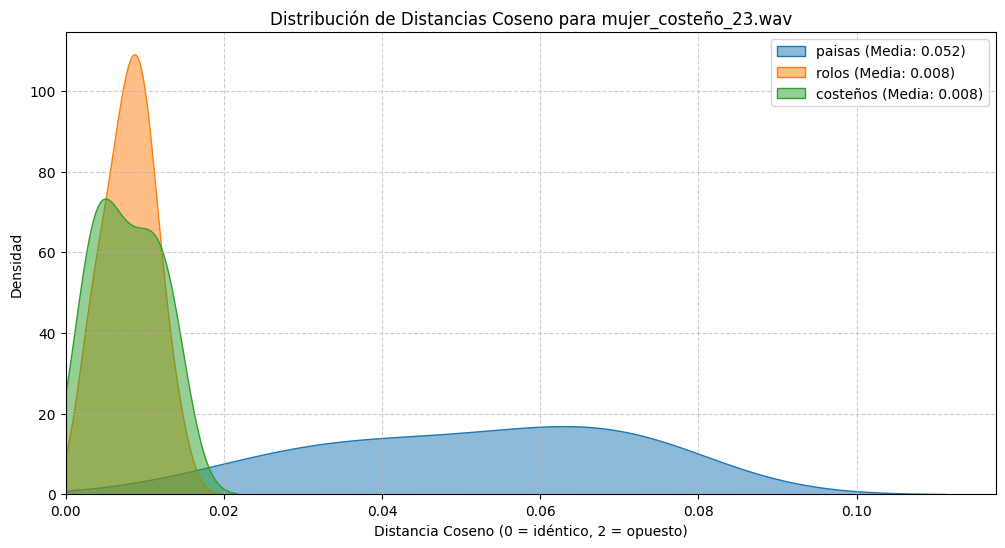

In [21]:
#'rolos', 'pruebaRolo5.wav'
#'paisas', 'mujer_paisa_17.wav'
#'paisas', 'mujer_paisa_18.wav'
#'paisas', 'hombre_paisa_22.wav'
#'costeños', 'mujer_costeño_23.wav'
ruta_prueba = os.path.join(base_drive_path, 'voz_prueba', 'costeños', 'mujer_costeño_23.wav')
detectar_acento(ruta_prueba, modelos_promedio)